In [1]:
import numpy as np
import sklearn
from sklearn import *
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def sample_v(f,c,v):
    beta_new = (2 + 0.5*(np.dot(np.dot((f),np.linalg.inv(c)),(f).T)))
    return (1/np.random.gamma(52, (1/beta_new)))
def sample_v2(f,c,v):
    beta_new = (2 + 0.5*(np.dot(np.dot((f),np.linalg.inv(c)),(f).T)))
    return (1/np.random.gamma(52, (1/beta_new)))



In [3]:
s= np.random.uniform(-1,1,100).reshape(100,1)

In [4]:
target=[]
for i in s:
    if i>=0:
        target.append(1)
    else:
        target.append(0)
        import random
z=[]
for i in target:
    if i==1:
        z.append(random.uniform(0.0001, 1))
    else:
        z.append(random.uniform(-1, -0.0001))
zvec= np.array(z)
zvec=zvec.reshape((100,1))
vlist=[]
flist=[]
zlist=[]

In [5]:
cov=sklearn.metrics.pairwise.rbf_kernel(s, Y=None, gamma=0.5) + np.eye(100,100)*0.00001
v= 1/np.random.gamma(2,0.5)
for i in range(0,2400):
    vlist.append(float(v))
    fcov=np.linalg.inv(np.linalg.inv(v*cov) + np.eye(100,100))
    fmean= np.dot(fcov,zvec)
    f_samples=np.random.multivariate_normal(fmean.flatten(), fcov, 1).T
    flist.append(f_samples)
    zz=np.zeros(100)
    index=0
    for i,j in zip(target,f_samples):
        if i==1:
            a=np.random.normal(j,1,10000)
            for k in a:
                if k>0:
                    zvec[index]=k
                    zz[index]=(k)
                    break
                    
        else:
            a= np.random.normal(j,0,10000)
            for k in a:
                if k<0:
                    zvec[index]=k
                    zz[index]=(k)
                    break
        index+=1
    zlist.append(zz)
    f_pure=np.random.multivariate_normal(np.zeros(100), v*cov, 1).T
    v=sample_v(f_pure.T,cov,v)  

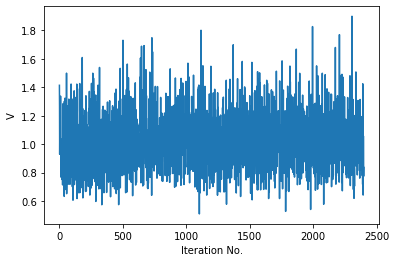

In [6]:
plt.plot(vlist)
plt.xlabel("Iteration No.")
plt.ylabel("V")
plt.show()

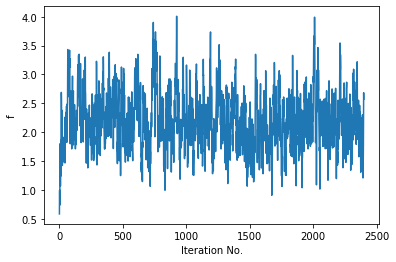

In [8]:
plt.plot(pd.DataFrame(np.array(flist).reshape(2400,100))[1])
plt.xlabel("Iteration No.")
plt.ylabel("f")
plt.show()

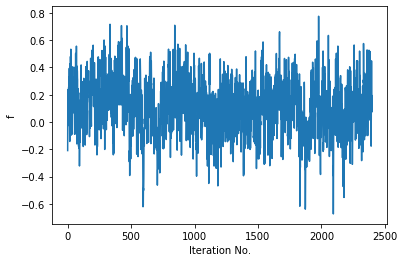

In [10]:
plt.plot(pd.DataFrame(np.array(flist).reshape(2400,100))[2])
plt.xlabel("Iteration No.")
plt.ylabel("f")
plt.show()

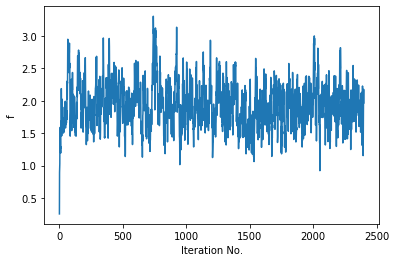

In [11]:
plt.plot(pd.DataFrame(np.array(flist).reshape(2400,100))[3])
plt.xlabel("Iteration No.")
plt.ylabel("f")
plt.show()

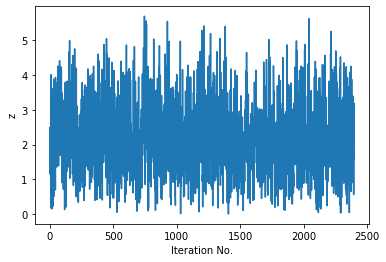

In [12]:
plt.plot(pd.DataFrame(np.array(zlist).reshape(2400,100))[1])
plt.xlabel("Iteration No.")
plt.ylabel("z")
plt.show()

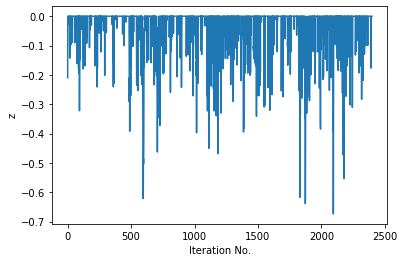

In [13]:
plt.plot(pd.DataFrame(np.array(zlist).reshape(2400,100))[2])
plt.xlabel("Iteration No.")
plt.ylabel("z")
plt.show()

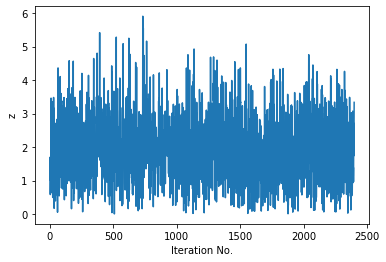

In [14]:
plt.plot(pd.DataFrame(np.array(zlist).reshape(2400,100))[3])
plt.xlabel("Iteration No.")
plt.ylabel("z")
plt.show()